In [3]:
import anndata as ad
import crested

adata= ad.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_dars.h5ad")


In [ ]:
import os
os.environ["PATH"] = "/home/niklas.kempynck/meme/bin:" + os.environ["PATH"]
meme_db, motif_to_tf_file = crested.get_motif_db()

In [ ]:
# run tfmodisco on the contribution scores
import crested
crested.tl.modisco.tfmodisco(
    window=1000,
    output_dir="/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/combined_modisco_results_ft_500//",
    contrib_dir="/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/combined_modisco_results_ft_500//",
    report=True,  # Optional, will match patterns to motif MEME database
    meme_db=meme_db,  # File to MEME database
    max_seqlets=20000,
)

2025-07-23T16:27:59.162050-0700 INFO No class names provided, using all found in the contribution directory: ['GM_STR', 'GM_exSTRd', 'WM']
Modisco results already exist for class: GM_STR


In [58]:
adata.obs_names

Index(['GM_STR', 'GM_exSTRd', 'WM'], dtype='object')

2025-07-21T20:02:17.929176-0700 INFO Starting genomic contributions plot for classes: ['GM_STR', 'GM_exSTRd', 'WM']


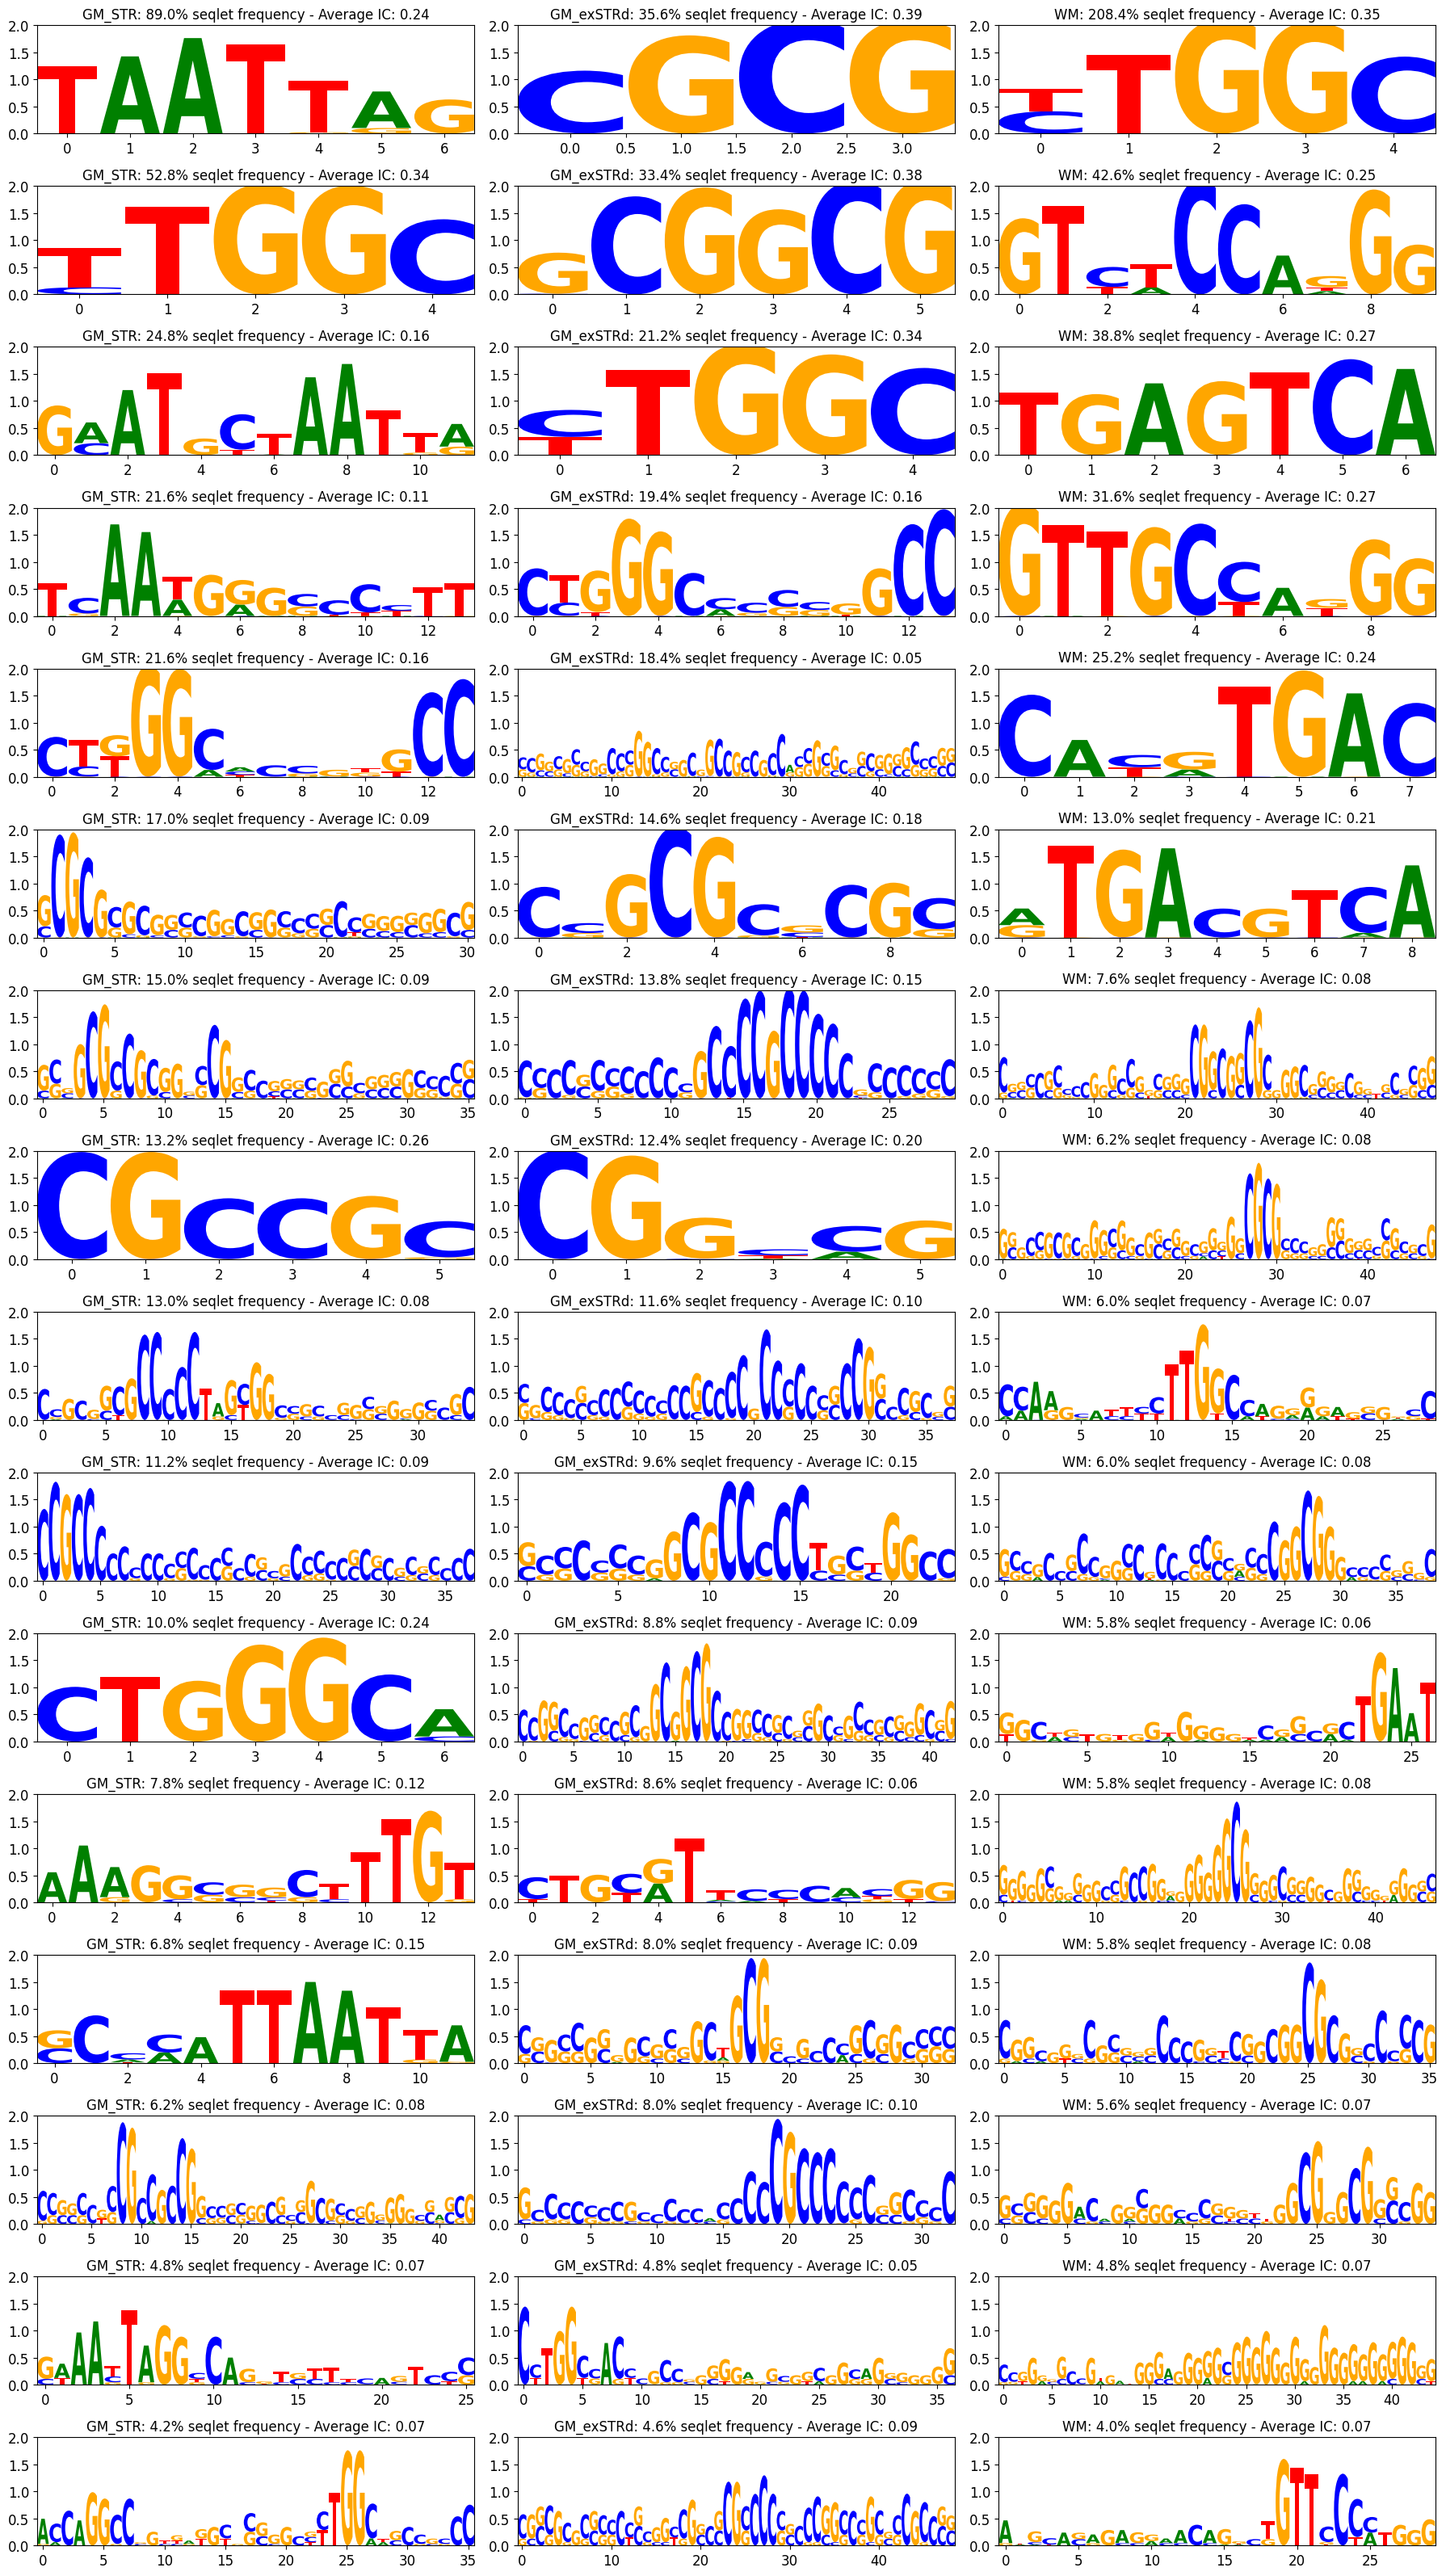

In [59]:
%matplotlib inline
top_k = 500
crested.pl.patterns.modisco_results(
    classes=["GM_STR","GM_exSTRd","WM"],
    contribution="positive",
    contribution_dir="/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/evogen-dnaseq-modeling/basal_ganglia/astro/modisco_results_ft_500/",
    num_seq=top_k,
    y_max=0.15,
    viz="pwm",
)  # You can also visualize in 'pwm' format

In [5]:
# First we obtain the resulting modisco files per class
matched_files = crested.tl.modisco.match_h5_files_to_classes(
    contribution_dir="/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/", classes=list(adata.obs_names)
)

In [6]:
matched_files

{'GM_STR': '/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/GM_STR_modisco_results.h5',
 'GM_exSTRd': '/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/GM_exSTRd_modisco_results.h5',
 'WM': '/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/WM_modisco_results.h5'}

In [7]:
sim_matrix, pattern_ids, pattern_dict = crested.tl.modisco.calculate_tomtom_similarity_per_pattern(
    matched_files = matched_files,
    trim_ic_threshold=0.025,
    verbose=True
)

Reading file /allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/GM_STR_modisco_results.h5
Reading file /allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/GM_exSTRd_modisco_results.h5
Reading file /allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/WM_modisco_results.h5
Total patterns: 60


In [ ]:
import pandas as pd
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex

groups = []
for id in pattern_ids:
    ct = '_'.join(id.split('_')[:-3])
    groups.append(ct)

unique_cats = pd.unique(groups)
group_colors = {'WM': 'lightgreen', 'GM_STR': 'orange', 'GM_exSTRd': 'darkblue'}

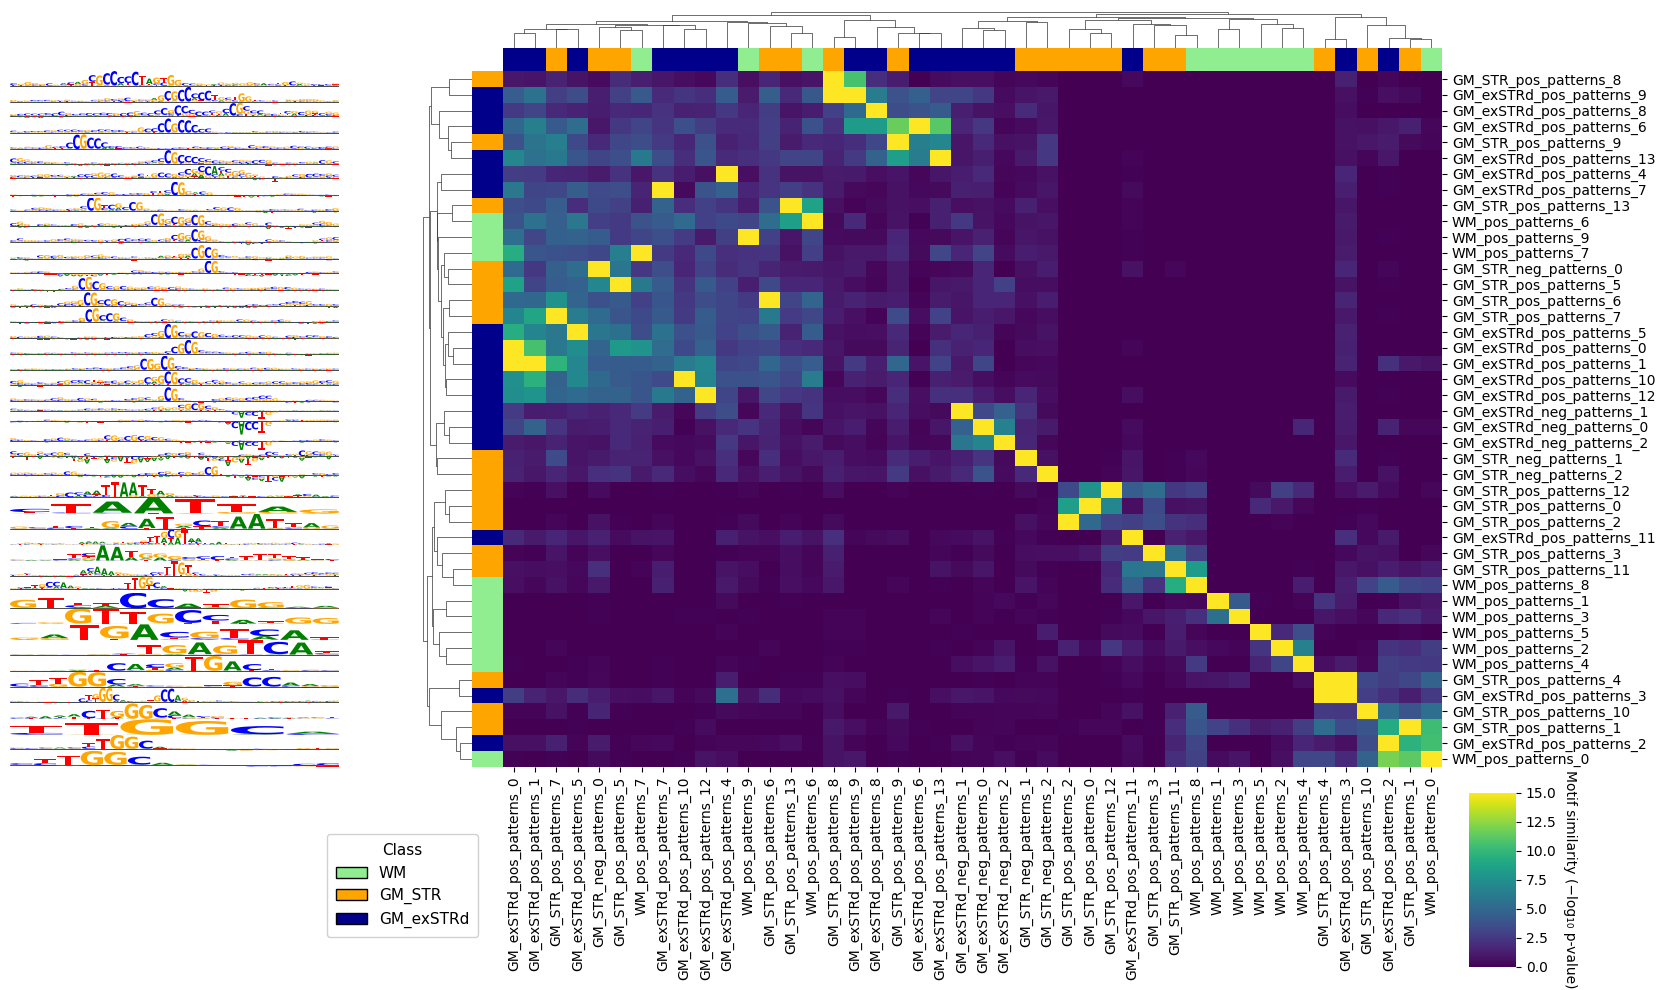

In [64]:
%matplotlib inline
crested.pl.patterns.clustermap_tomtom_similarities(
    sim_matrix=sim_matrix,
    ids=pattern_ids,
    pattern_dict=pattern_dict,
    group_info = [(groups, group_colors)], # Grouping labels
    min_seqlets=30, # Add a minimum amount of seqlets to take the most relevant patterns
)

In [8]:
# Then we cluster matching patterns, and define a pattern matrix [#classes, #patterns] describing their importance
all_patterns = crested.tl.modisco.process_patterns(
    matched_files,
    sim_threshold=8,  # The similarity threshold used for matching patterns. We take the -log10(pval), pval obtained through TOMTOM matching from memesuite-lite
    trim_ic_threshold=0.025,  # Information content (IC) threshold on which to trim patterns
    discard_ic_threshold=0.2,  # IC threshold used for discarding single instance patterns
    verbose=True,  # Useful for doing sanity checks on matching patterns
)

Reading file /allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/GM_STR_modisco_results.h5
Match between GM_STR_pos_patterns_5 and GM_STR_neg_patterns_0 with similarity score 9.03
Reading file /allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro//modisco_results_ft_500/GM_exSTRd_modisco_results.h5
Match between GM_exSTRd_neg_patterns_3 and GM_exSTRd_neg_patterns_2 with similarity score 8.40
Match between GM_exSTRd_pos_patterns_0 and GM_STR_pos_patterns_5 with similarity score 8.80
Match between GM_exSTRd_pos_patterns_1 and GM_STR_pos_patterns_7 with similarity score 10.61
Match between GM_exSTRd_pos_patterns_2 and GM_STR_pos_patterns_1 with similarity score 9.45
Match between GM_exSTRd_pos_patterns_3 and GM_STR_pos_patterns_4 with similarity score 12.47
Match between GM_exSTRd_pos_patterns_6 and GM

In [9]:
pattern_matrix = crested.tl.modisco.create_pattern_matrix(
    classes=list(adata.obs_names),
    all_patterns=all_patterns,
    normalize=False,
    pattern_parameter="seqlet_count_log",
)
pattern_matrix.shape

(3, 39)

In [10]:
import numpy as np
np.exp(4.5)

np.float64(90.01713130052181)

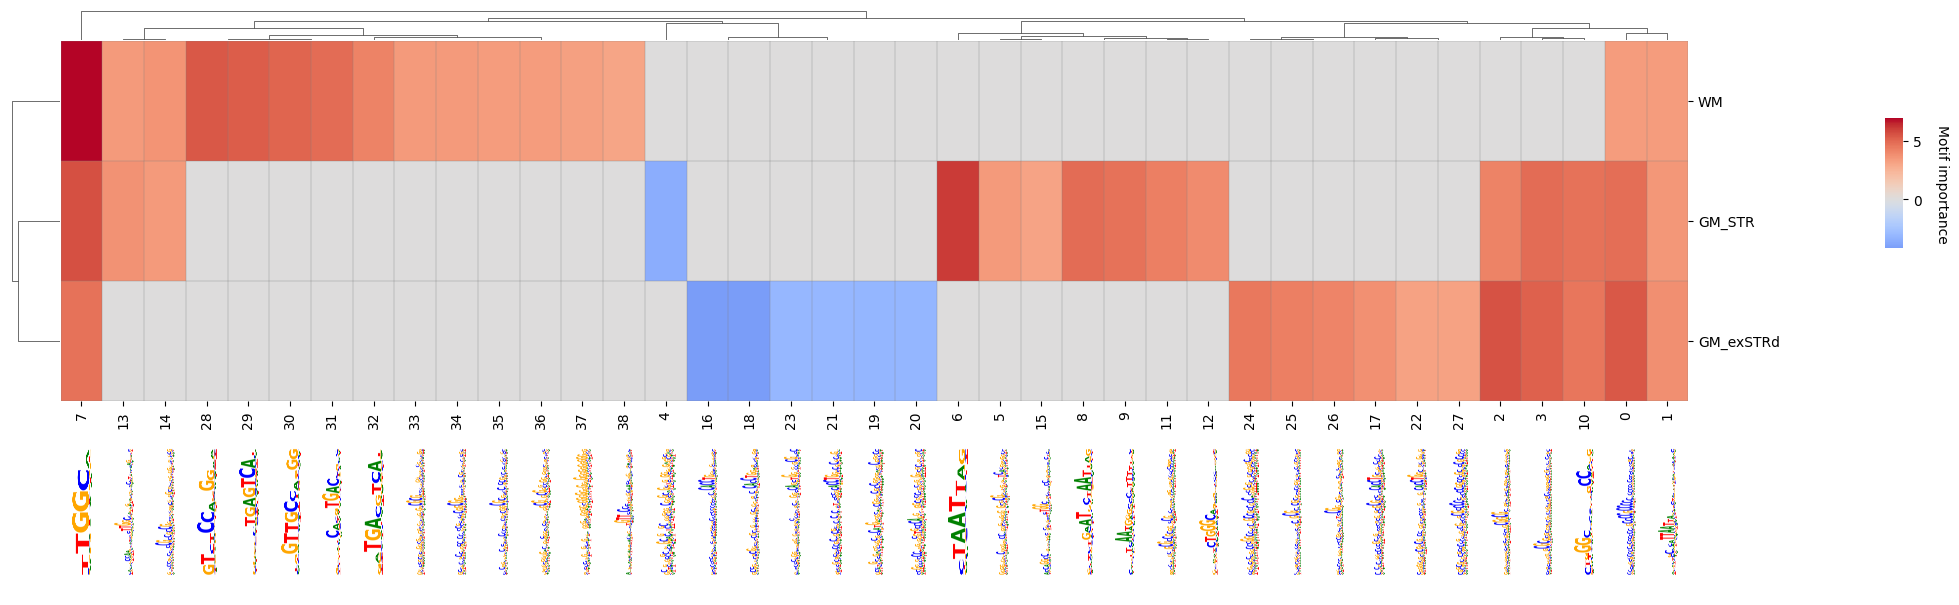

In [11]:
%matplotlib inline
crested.pl.patterns.clustermap_with_pwm_logos(
    pattern_matrix,
    list(adata.obs_names),
    pattern_dict=all_patterns,
    figsize=(18, 3),
    grid=True,
    dendrogram_ratio=(0.03, 0.08),
    importance_threshold=3,  # 3.5,
    logo_height_fraction=0.45,
    logo_y_padding=0.2,
)

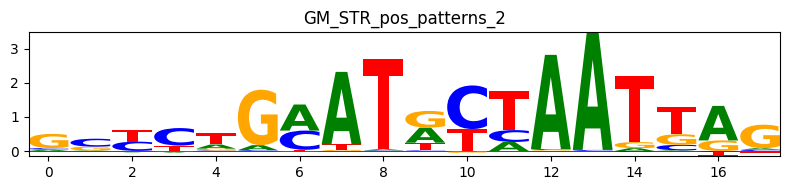

In [117]:
crested.pl.patterns.class_instances(all_patterns, 8,class_representative=True)

## Matching to snRNA

In [12]:
import crested
import anndata

file_path = (
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/hct_ux3_cellxgene/anndata_080/BasalGanglia/Astro/HMBA_human_Astro_3subGroups.h5ad"  # Locate h5 file containing scRNAseq data
)

adata = anndata.read_h5ad(file_path)

In [13]:
cell_type_column = "subGroup"
mean_expression_df = crested.tl.modisco.calculate_mean_expression_per_cell_type(
    file_path, cell_type_column, cpm_normalize=False
)

/home/niklas.kempynck/miniconda3/envs/crested_testing/lib/python3.10/site-packages/crested/tl/modisco/_tfmodisco.py:1625: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression_per_cell_type: pd.DataFrame = gene_expression_df.groupby(


In [14]:
mean_expression_df.index

CategoricalIndex(['GM STR', 'GM exSTR', 'WM'], categories=['GM STR', 'GM exSTR', 'WM'], ordered=False, dtype='category', name='subGroup')

In [15]:
adata.obs_names


Index(['AAACAGCCATTGTGGC-2362_A05', 'AAACATGCAGTAGGAT-2362_A05',
       'AAACCGCGTTGACTTC-2362_A05', 'AAAGCCGCACCTAATG-2362_A05',
       'AAAGCGGGTCATCATC-2362_A05', 'AAAGGACGTTCGCTTG-2362_A05',
       'AAATCCGGTCACGAAC-2362_A05', 'AAATGCCTCTTTGAGA-2362_A05',
       'AACAGATAGTTACCGG-2362_A05', 'AACATCATCAAGCGCC-2362_A05',
       ...
       'TTGGAGGCAGTAGGTG-2016_B03', 'TTGGGCGGTCGAAGTC-2016_B03',
       'TTGTAAGTCGTTAGTA-2016_B03', 'TTGTTCCCATAGCTGC-2016_B03',
       'TTTAAGGTCCTGTTCA-2016_B03', 'TTTAGCTTCCTACCTA-2016_B03',
       'TTTAGGATCACTAGGT-2016_B03', 'TTTATGGAGTTGTCCC-2016_B03',
       'TTTGACCGTGCTTTAC-2016_B03', 'TTTGTCCCATTGCGGT-2016_B03'],
      dtype='object', length=134124)

In [24]:
mean_expression_df = mean_expression_df.rename(index={"GM STR":"GM_STR", "GM exSTR":"GM_exSTRd"})

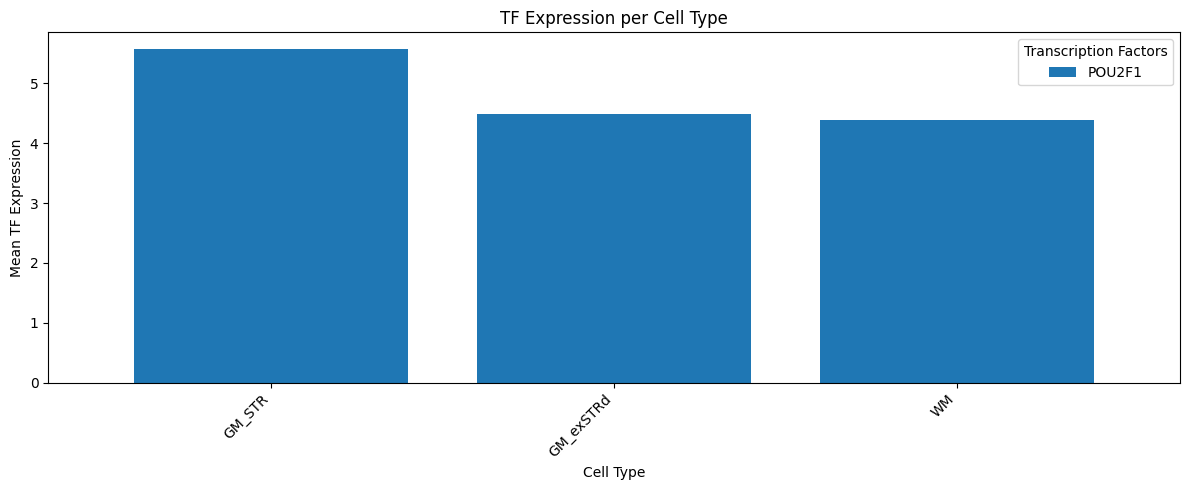

In [25]:
crested.pl.patterns.tf_expression_per_cell_type(
    mean_expression_df, ["POU2F1"]
)

In [26]:
adata= ad.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_dars.h5ad")

classes = list(adata.obs_names)

contribution_dir = "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/modisco_results_ft_500/"
html_paths = crested.tl.modisco.generate_html_paths(
    all_patterns, classes, contribution_dir
)

pattern_match_dict = crested.tl.modisco.find_pattern_matches(
    all_patterns, html_paths, q_val_thr=0.05
)  # q_val threshold to only select significant matches

In [27]:
meme_db, motif_to_tf_file = crested.get_motif_db()
motif_to_tf_df = crested.tl.modisco.read_motif_to_tf_file(
   motif_to_tf_file
)

In [28]:
cols = [
    "Mouse_Direct_annot",
    "Mouse_Orthology_annot",
    "Cluster_Mouse_Direct_annot",
    "Cluster_Mouse_Orthology_annot",
]
cols = [
    "Human_Direct_annot",
    "Human_Orthology_annot",
    "Cluster_Human_Direct_annot",
    "Cluster_Human_Orthology_annot",
]
pattern_tf_dict, all_tfs = crested.tl.modisco.create_pattern_tf_dict(
    pattern_match_dict, motif_to_tf_df, all_patterns, cols
)
tf_ct_matrix, tf_pattern_annots = crested.tl.modisco.create_tf_ct_matrix(
    pattern_tf_dict,
    all_patterns,
    mean_expression_df,
    classes,
    log_transform=False,
    normalize_pattern_importances=False,
    normalize_gex=True,
    min_tf_gex=0.95,
    importance_threshold=4,
    pattern_parameter="seqlet_count_log",
    filter_correlation=True,
    verbose=True,
    zscore_threshold=1.1,
    correlation_threshold=0.9,
)

Total columns before threshold filtering: 818
Total columns after threshold filtering: 191
Total columns removed: 627
Total columns before correlation filtering: 191
Total columns after correlation filtering: 52
Total columns removed: 139


/home/niklas.kempynck/miniconda3/envs/crested_testing/lib/python3.10/site-packages/crested/pl/patterns/_modisco_results.py:1108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


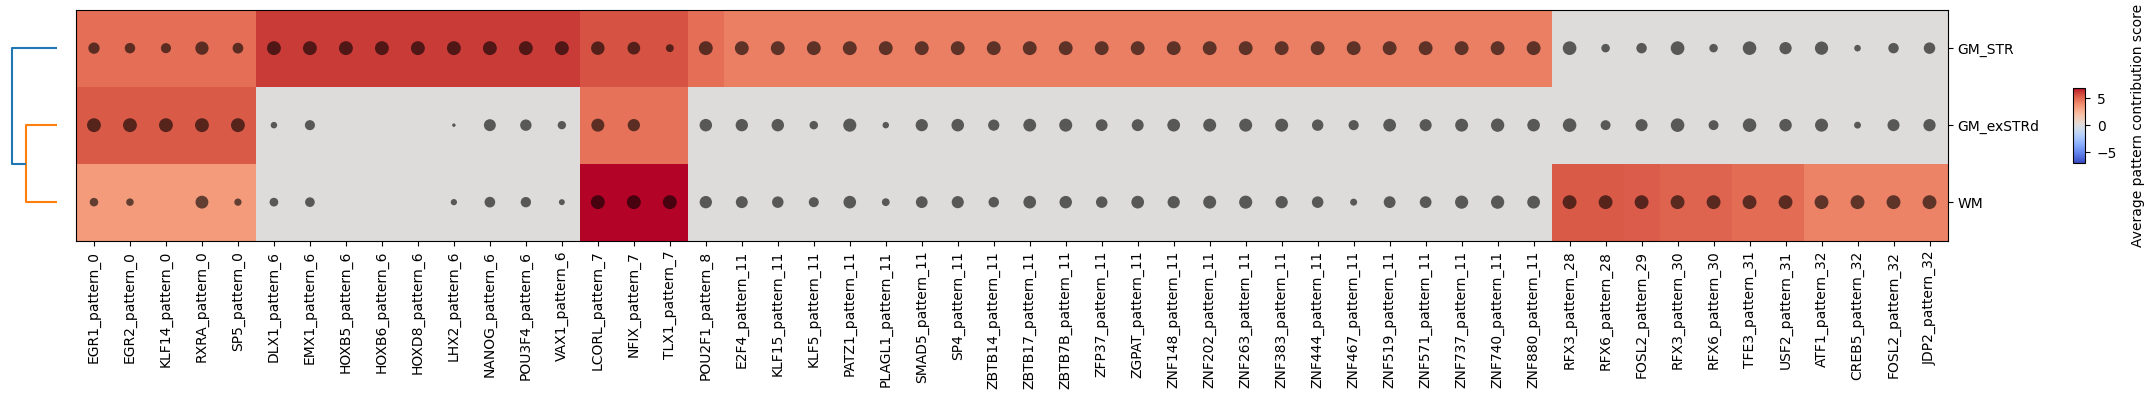

In [29]:
crested.pl.patterns.clustermap_tf_motif(
    tf_ct_matrix,
    heatmap_dim="contrib",
    dot_dim="gex",
    class_labels=classes,
    pattern_labels=tf_pattern_annots,
    fig_size=(25, 3),
    cluster_rows=True,
    cluster_columns=False,
)

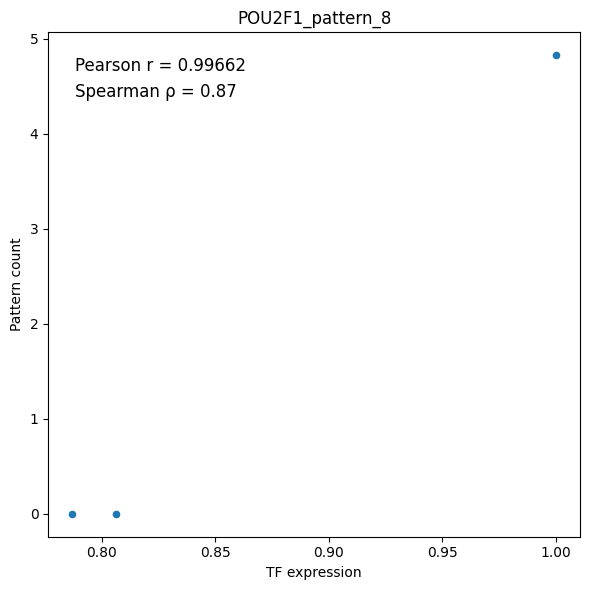

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
%matplotlib inline
matplotlib.rcParams["pdf.fonttype"] = 42  
matplotlib.rcParams["ps.fonttype"] = 42 

pat = 'POU2F1_pattern_8'
# Select data
idx = np.argwhere(np.array(tf_pattern_annots)==pat)[0,0]
x = tf_ct_matrix[:,idx,0]
y = np.abs(tf_ct_matrix[:,idx,1])

# Compute correlations
pearson_r, pearson_p = stats.pearsonr(x, y)
pearson_r = np.corrcoef(x,y)[0, 1]

spearman_r, spearman_p = stats.spearmanr(x, y)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=20)
plt.xlabel("TF expression")
plt.ylabel("Pattern count")
plt.title(pat)

# Annotate correlations
plt.text(0.05, 0.95, f"Pearson r = {pearson_r:.5f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f"Spearman ρ = {spearman_r:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()